# Exploratory Data Analysis

This is the third step in the Data Science Method. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot.

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
  * Outliers
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load clean data from previous step

Also check data type and sync it based on analysis on previous step

<img src = 'figure/Data_desc.png'>

<img src = 'figure/Data_desc_cat.png'>

In [2]:
filename = 'data/clean_data.csv'
df = pd.read_csv(filename)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int64  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int64  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int64  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  float64
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  int64  
 12  Browser                  11248 non-null  int64  
 13  Region                   11248 non-null  int64  
 14  TrafficType           

In [4]:
# categorical feature
#df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [5]:
#int features
df['Administrative'] = df['Administrative'].astype('int')
df['Informational'] = df['Informational'].astype('int')
df['ProductRelated'] = df['ProductRelated'].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11248 entries, 0 to 11247
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int32  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int32  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int32  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  object 
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  object 
 12  Browser                  11248 non-null  object 
 13  Region                   11248 non-null  object 
 14  TrafficType           

### Detecting Outliers and Basic visualisation

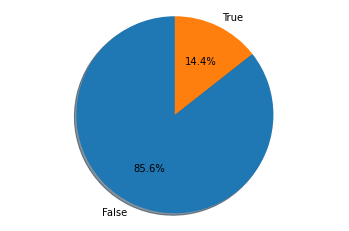

In [7]:
# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(list(df.Revenue.value_counts()), labels=['False','True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

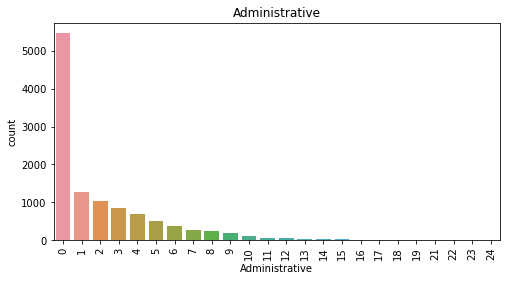

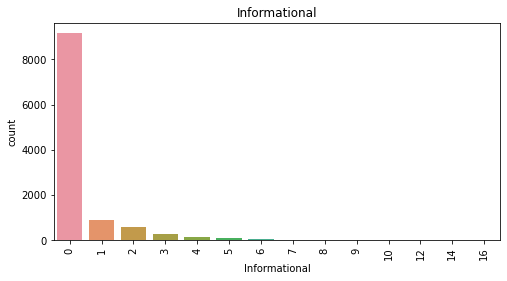

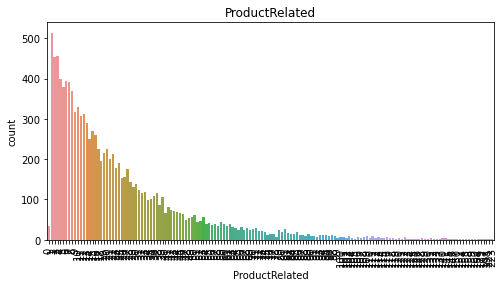

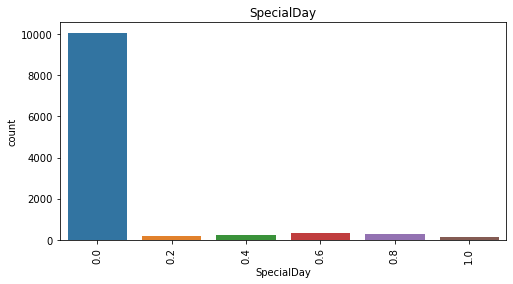

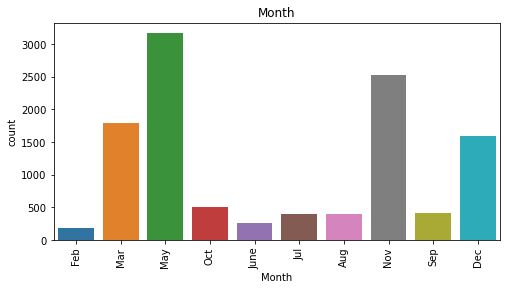

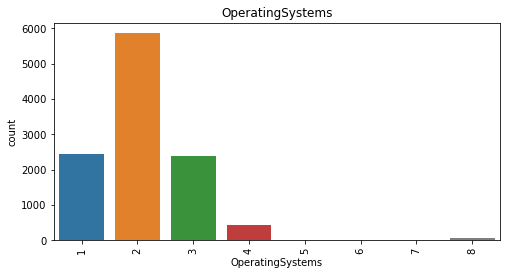

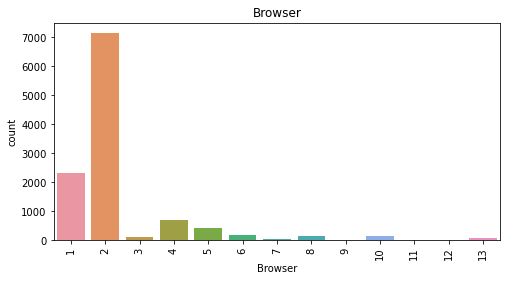

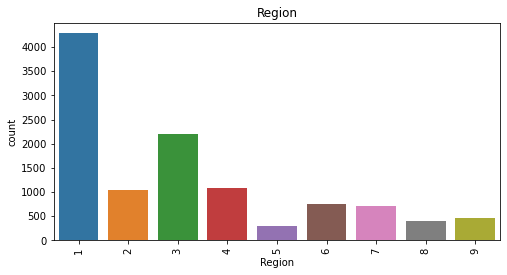

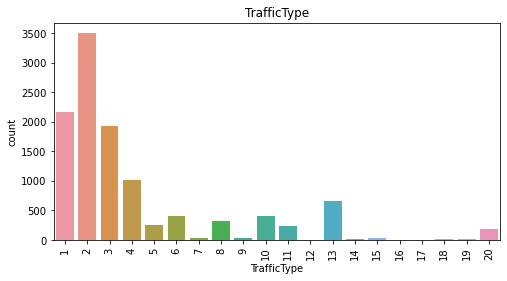

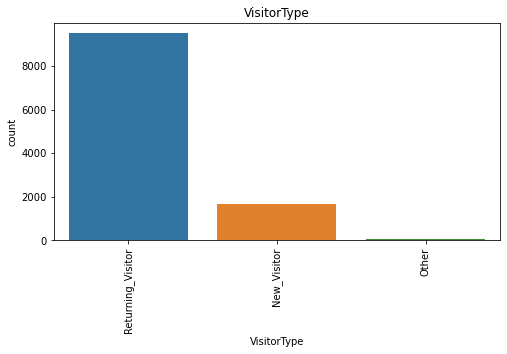

In [8]:
#Plot categorical data
y = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
#y = list(df.dtypes[df.dtypes != 'object'].index)

for i in y:
    plt.figure(figsize=(8,4))
    plt.title(i)
    sns.countplot(data = df, x = i)
    plt.xticks(rotation=90)
    plt.show()

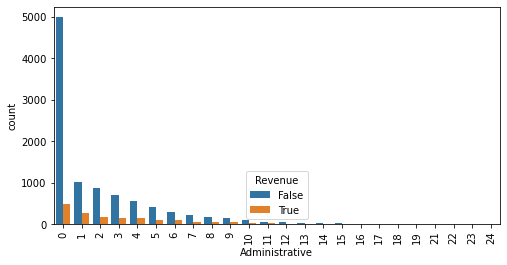

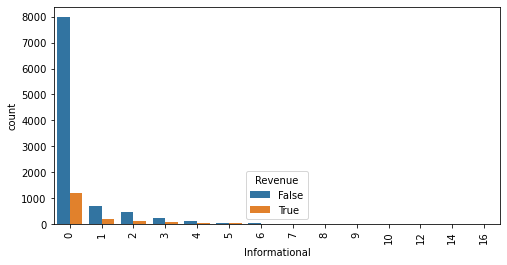

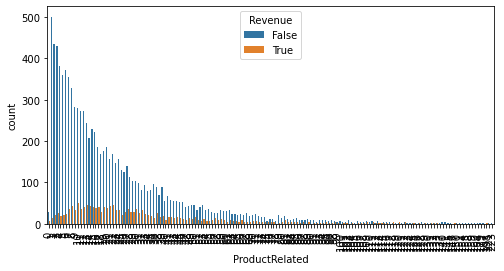

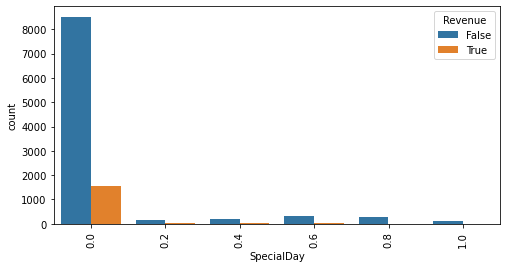

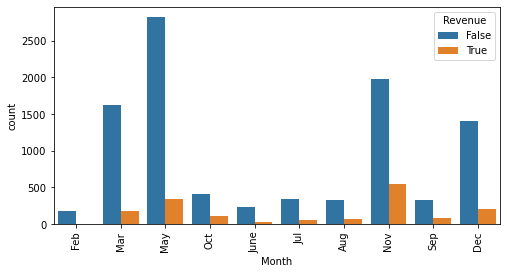

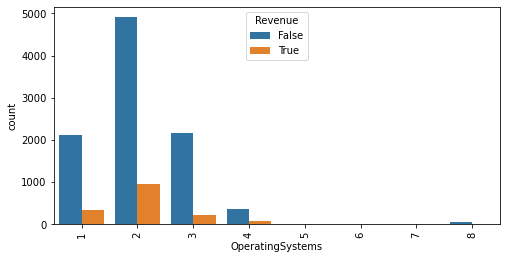

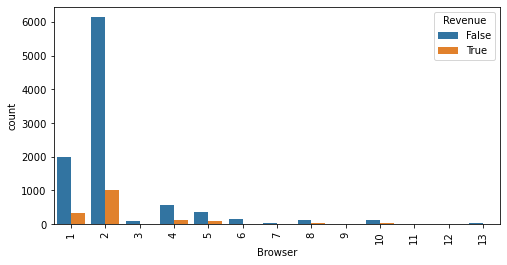

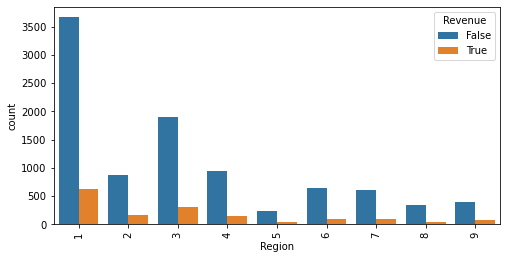

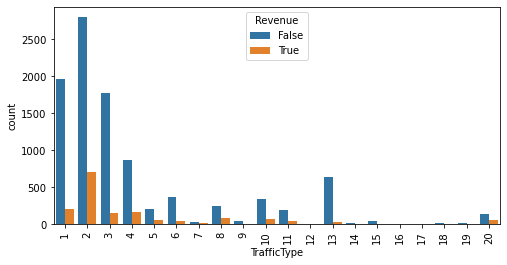

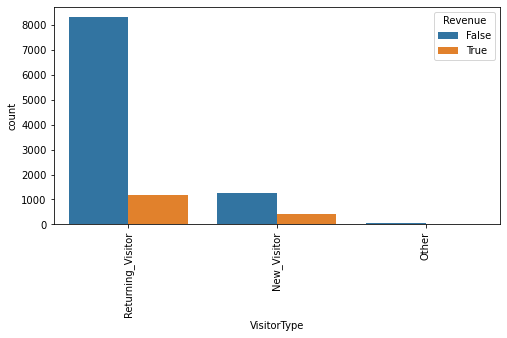

In [9]:
#Plot categorical data wrt 'Revenue'
for i in y:
    plt.figure(figsize=(8,4))
    sns.countplot(data = df,hue = 'Revenue', x = i)
    plt.xticks(rotation=90)
    plt.show()

In [10]:
df.Revenue.value_counts()

False    9629
True     1619
Name: Revenue, dtype: int64

Few observations,
1. There is hardly any shopping on or the day's approching any special day
2. May, November, March and December have peak. There are 2 opportunity windows, March - May and November - December
3. Even if on surface it looks like there is more sale during Weekdays, but during Weekends customers seem to buy more wrt visiting the site
4. Browser 2, seems to have a lot of potential.

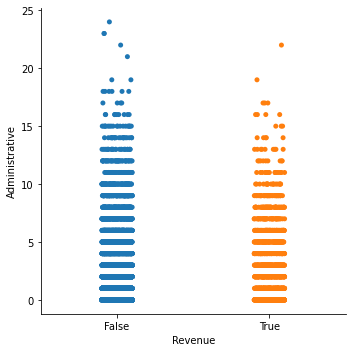

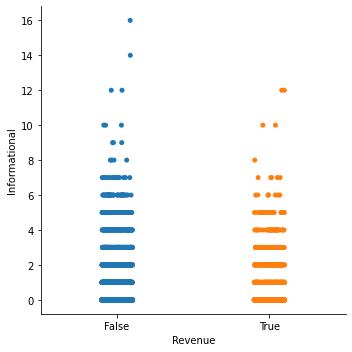

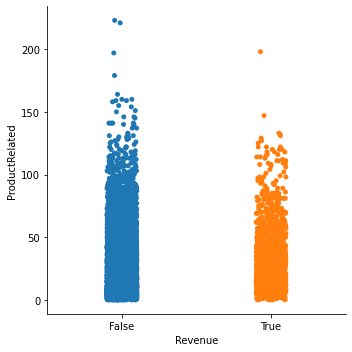

In [11]:
y =  ['Administrative', 'Informational', 'ProductRelated']

for i in y:
    ax = sns.catplot(x="Revenue", y=i , data=df)

In [14]:
df.drop(df[df['Administrative']>=22].index,inplace = True)

df.drop(df[df['Informational']>=12].index, inplace = True)

df.drop(df[df['ProductRelated']>=180].index, inplace = True)

In [15]:
df.Revenue.value_counts()

False    9618
True     1615
Name: Revenue, dtype: int64

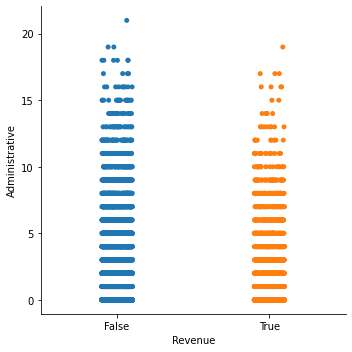

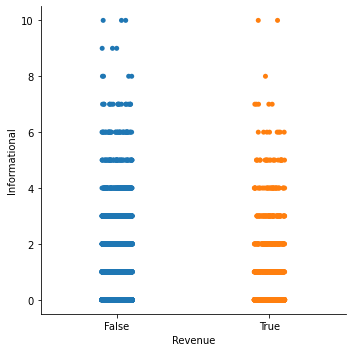

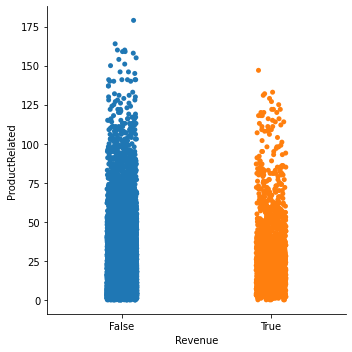

In [16]:
for i in y:
    ax = sns.catplot(x="Revenue", y=i , data=df)

### Relationship between Variables

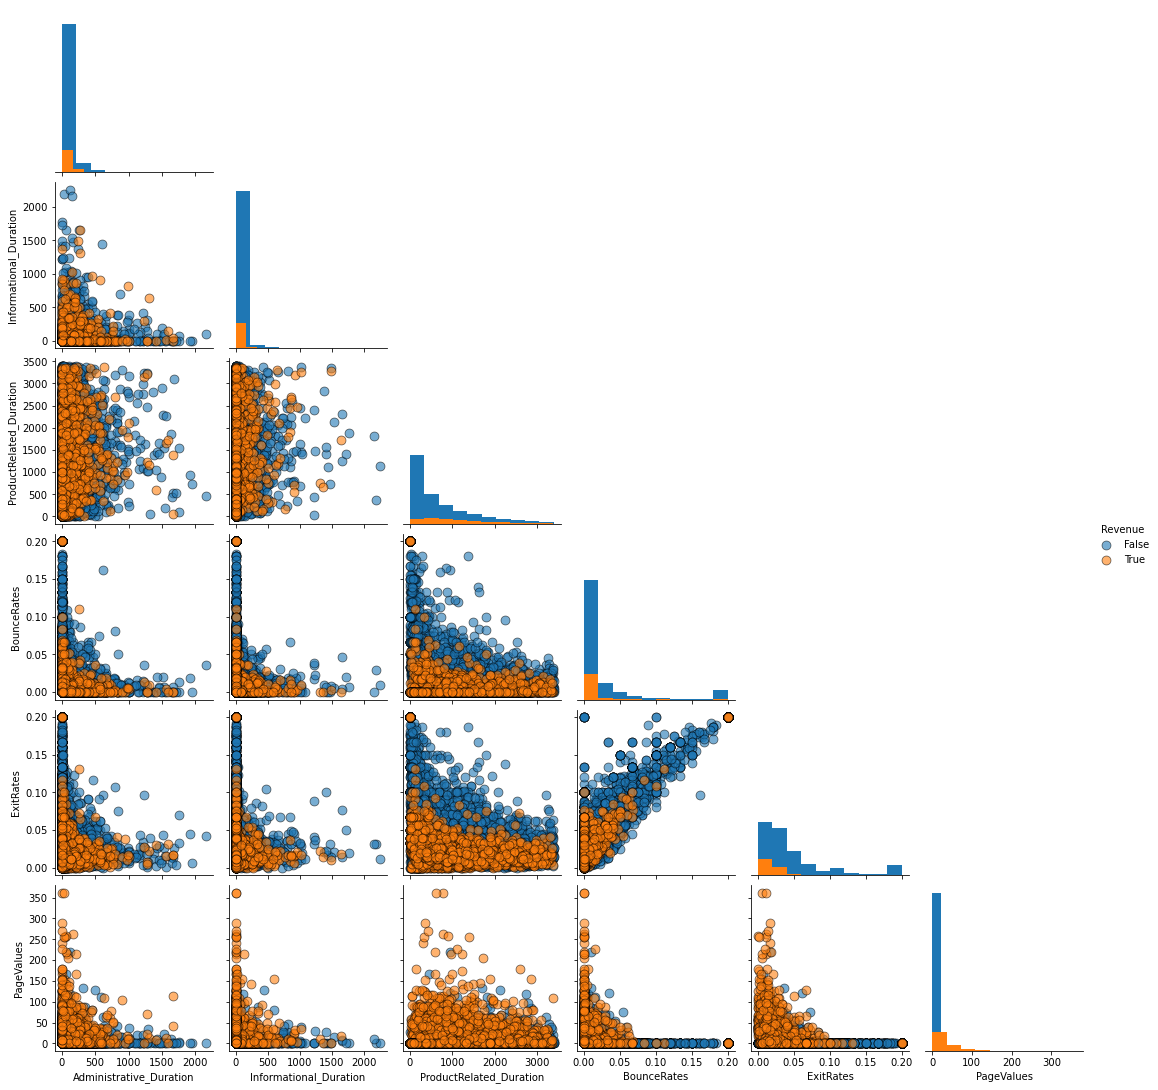

In [17]:
g = sns.pairplot(df
                 ,vars = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
                 ,hue = 'Revenue'
                 ,diag_kind = 'hist'
                 ,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}
                 ,corner=True)

ExitRates and BounceRates seem correlated

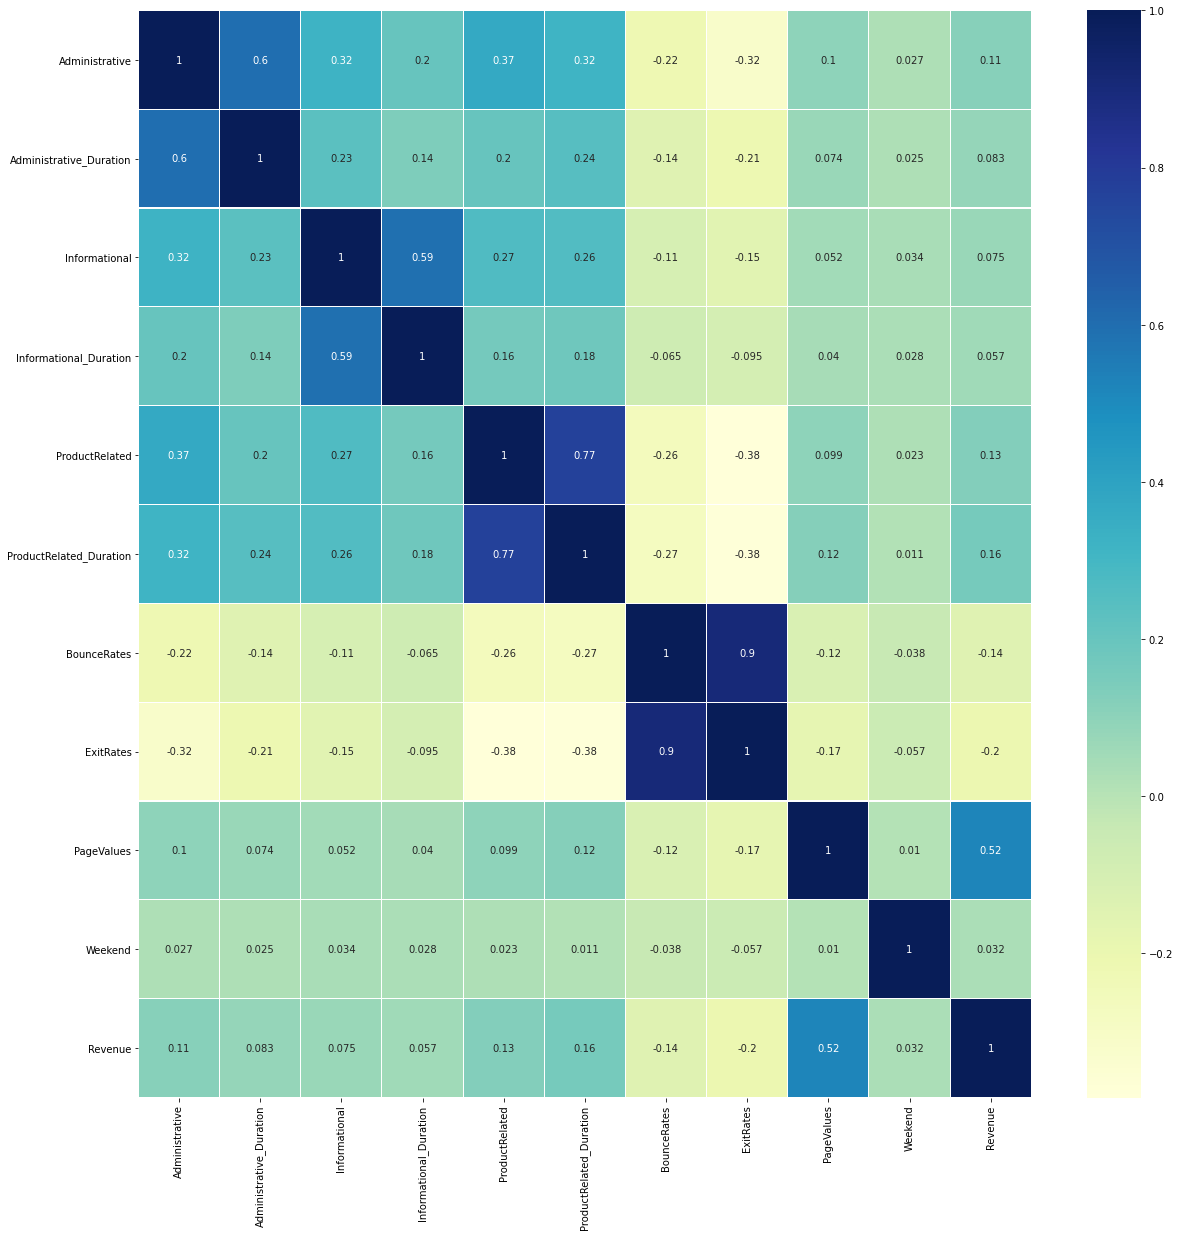

In [18]:
#create the correlation matrix heat map
#Calculate the correlation coefficients

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

ExitRates and Bounce Rates are highly co-related

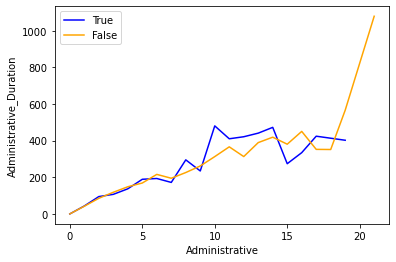

In [19]:
buffer_T = df[df.Revenue].groupby(['Administrative']).mean()['Administrative_Duration']
buffer_F = df[~ df.Revenue].groupby(['Administrative']).mean()['Administrative_Duration']
plt.plot(buffer_T, c ='blue', label = 'True')
plt.plot(buffer_F, c = 'orange', label = 'False')
plt.xlabel('Administrative')
plt.ylabel('Administrative_Duration')
plt.legend(loc='best')
plt.show()

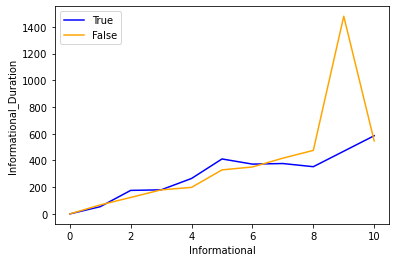

In [20]:
buffer_T = df[df.Revenue].groupby(['Informational']).mean()['Informational_Duration']
buffer_F = df[~ df.Revenue].groupby(['Informational']).mean()['Informational_Duration']
plt.plot(buffer_T, c ='blue', label = 'True')
plt.plot(buffer_F, c = 'orange', label = 'False')
plt.xlabel('Informational')
plt.ylabel('Informational_Duration')
plt.legend(loc='best')
plt.show()

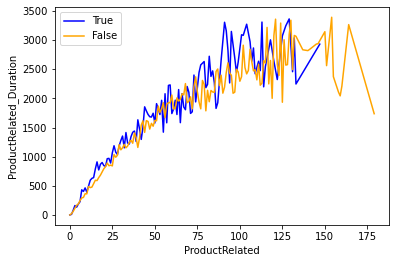

In [21]:
buffer_T = df[df.Revenue].groupby(['ProductRelated']).mean()['ProductRelated_Duration']
buffer_F = df[~ df.Revenue].groupby(['ProductRelated']).mean()['ProductRelated_Duration']
plt.plot(buffer_T, c ='blue', label = 'True')
plt.plot(buffer_F, c = 'orange', label = 'False')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.legend(loc='best')
plt.show()

From the above plots we can see that, the time spent by visitors pages are related to number of pages.
Eg. in above figure a visitors duration on ProductRelated pages increases as number of pages do. It seems like Visitors who don't convert stay ideal and don't interact inth the website.

### Saving Data in a CSV

In [22]:
df.to_csv('data\clean_data2.csv',index = False)